Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-09-19 19:24:25.413898


- ASSIGNMENT: co2-vibrations
- POINTS: 3
- CATEGORY: homework
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-09-20 23:59:59
- GRADER: Noriyuki Yoshio


Molecules can be modeled as masses connected by springs. With these models, we can estimate how the atoms move and vibrate.

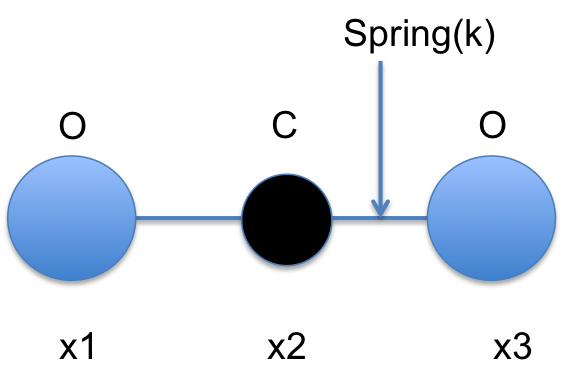

The equations of motion are defined as:

$M_O \frac{d^2x1}{dt^2} = k  (x2 - x1)$

$M_C \frac{d^2x2}{dt^2} = -k (x2 - x1) + k (x3 - x2)$

$M_O \frac{d^2x3}{dt^2} = -k (x3 - x2)$

Where $M_O=16$, $M_C=12$, and $k=48$. The $x_i$ variables represent a 1D deviation along the x-axis from the equilibrium positions of the atoms where the force is equal to zero.




# Convert this to a system of first-order differential equations



You can convert this to a system of FODEs by defining a new set of variables, e.g. $x4 = \frac{dx1}{dt}$, which can be interpreted as the velocity of the atom. Use this to derive a set of coupled first order differential equations. Write your equations here:



Converting above equation to a system of FODEs by defining:
1. $y_1 = \displaystyle \frac{dx_1}{dt}$
2. $y_2 = \displaystyle \frac{dx_2}{dt}$
3. $y_3 = \displaystyle \frac{dx_3}{dt}$

Thus, the equations become:
1. $M_O \displaystyle\frac{dy_1}{dt} = k  (x_2 - x_1)$
2. $M_C \displaystyle\frac{dy_2}{dt} = -k (x_2 - x_1) + k (x_3 - x_2)$
3. $M_O \displaystyle\frac{dy_3}{dt} = -k (x_3 - x_2)$



# Find the solution to this set of ODES



Assuming that at $t=0$, $x1 = -0.1, x2=0.0, x3=0.1$, and that the initial velocities of the atoms are 0, find a solution with solve\_ivp to your equations using solve\_ivp up to $t=10$.

-   Plot the positions (x1, x2, x3) for each atom as a function of time. Explain why they look the way they do for each atom.



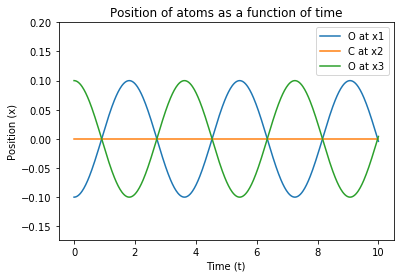

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

k = 48
Mo = 16
Mc = 12

def f(t, Y):
    x1, x2, x3, y1, y2, y3 = Y
    dx1dt = y1
    dx2dt = y2
    dx3dt = y3
    dy1dt = k * (x2 - x1) / Mo
    dy2dt = (-k * (x2 - x1) + k * (x3 - x2)) / Mc
    dy3dt = -k * (x3 - x2) / Mo
    return np.array([dx1dt, dx2dt, dx3dt, dy1dt, dy2dt, dy3dt])

Y0 = np.array([-0.1, 0, 0.1, 0, 0, 0])
tspan = np.array([0, 10])
teval, h = np.linspace(*tspan, 500, retstep=True)   

sol = solve_ivp(f, tspan, Y0, max_step=h)
sol.message, sol.success

import matplotlib.pyplot as plt
X1 = sol.y[0]
X2 = sol.y[1]
X3 = sol.y[2]

plt.plot(sol.t, sol.y[0].T, label = 'O at x1')
plt.plot(sol.t, sol.y[1].T, label = 'C at x2')
plt.plot(sol.t, sol.y[2].T, label = 'O at x3')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend()
plt.title('Position of atoms as a function of time')
plt.ylim(sol.y.min(), 0.20);
#plt.legend()

Based on the relative position of O and C atom, the combined differential equation leads to a sinusodial form of movement. 

1. **O at x1:** Initially, the O's acceleration (i.e.,  $\displaystyle\frac{d^2x_1}{dt^2}$) is positive. As the molecules move, their acceleration vary and change sign as time varies.
2. **O at x3:** Similarly, this O's acceleration (i.e.,  $\displaystyle\frac{d^2x_2}{dt^2}$) is negative and moves in negative direction.
3. **C at x2:** The acceleration equation of the C being at origin is such that it's acceleration remains 0, it doesn't gain any velocity and thus the position of Carbon doesn't change.

Though it seems that the atoms collide, in reality the atoms don't exist in 1-Dimension and must be revolving along the Y-axis too.

-   Pick another set of initial conditions, make a plot, and explain why the solution looks the way it does.  Comment on any difference or lack of difference.



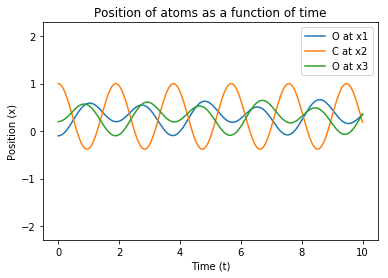

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

k = 48
Mo = 16
Mc = 12

def f(t, Y):
    x1, x2, x3, y1, y2, y3 = Y
    dx1dt = y1
    dx2dt = y2
    dx3dt = y3
    dy1dt = k * (x2 - x1) / Mo
    dy2dt = (-k * (x2 - x1) + k * (x3 - x2)) / Mc
    dy3dt = -k * (x3 - x2) / Mo
    return np.array([dx1dt, dx2dt, dx3dt, dy1dt, dy2dt, dy3dt])

#Changing the 
Y0 = np.array([-0.1, 1.0, 0.2, 0, 0, 0])
tspan = np.array([0, 10])
teval, h = np.linspace(*tspan, 500, retstep=True)   

sol = solve_ivp(f, tspan, Y0, max_step=h)
sol.message, sol.success

#Graph
import matplotlib.pyplot as plt
X1 = sol.y[0]
X2 = sol.y[1]
X3 = sol.y[2]

plt.plot(sol.t, sol.y[0].T, label = 'O at x1')
plt.plot(sol.t, sol.y[1].T, label = 'C at x2')
plt.plot(sol.t, sol.y[2].T, label = 'O at x3')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend()
plt.title('Position of atoms as a function of time')
plt.ylim(sol.y.min(), sol.y.max());

In the present condition, since I've moved the position of O atoms along x to '+0.2' units, the symmetry in earlier condition is no longer present! Thus, as expected, the change in initial values returns **different** solution to our differential equation.
(In case the initial velocities of the atoms were known; i.e. of $y_1, y_2 and y_3$, then we can get the net movement of molecule in x-direction also.)
